1. Общая выручка магазина составлет: 85085
2.Товар, который был продан наибольшее количество раз:
{'Картофель'}
3.Товар, который принес наибольшую выручку
{'Свинина'}


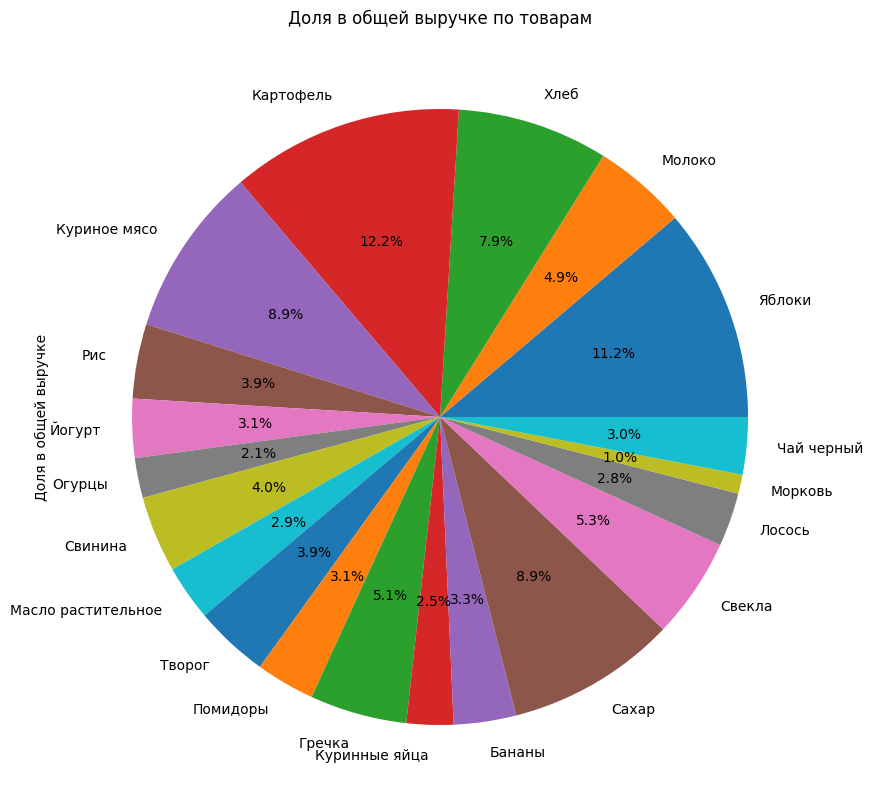

,Наименование товара,Кол-во проданных единиц,Доля в общей выручке
0,Яблоки,123,0.001446
1,Молоко,54,0.000635
2,Хлеб,87,0.001023
3,Картофель,134,0.001575
4,Куриное мясо,98,0.001152
5,Рис,43,0.000505
6,Йогурт,34,0.000400
7,Огурцы,23,0.000270
8,Свинина,44,0.000517
9,Масло растительное,32,0.000376


In [29]:
import csv
import random
import pandas as pd
import matplotlib.pyplot as plt

def quick_sort(llist):
    if len(llist) <= 1:
        return llist
    else:
        x = llist[random.randint(0, len(llist)-1)][1]
    s_mas = []
    m_mas = []
    e_mas = []
    for i in range(len(llist)):
        if int(llist[i][1]) > x:
            m_mas.append(llist[i])
        if int(llist[i][1]) < x:
            s_mas.append(llist[i])
        if int(llist[i][1]) == x:
            e_mas.append(llist[i])
    return quick_sort(s_mas) + e_mas + quick_sort(m_mas)

def sort_puzyrek(marklist):
    l = len(marklist)
    for i in range(l - 1):
        for j in range(i + 1, l):
            if marklist[i][1] > marklist[j][1]:
                t = marklist[i]
                marklist[i] = marklist[j]
                marklist[j] = t
    return marklist

def binary_searching (arr, searching_value):
    left = 0
    right = len(arr) - 1
    mid = (left + right) // 2
    while arr[mid][1] != searching_value and left <= right:
        if searching_value > arr[mid][1]:
            left = mid + 1
        else:
            right = mid - 1
        mid = (left + right) // 2
    if left > right:
        return -1
    else:
        return mid

with open('products.csv', 'r', encoding="utf8") as file:
    count = 0
    summa = 0
    tovar_name = []
    vyruchka = []
    number = []
    for line in file:
        str = []
        if count != 0:
            str = line.strip()
            str = str.split(';')
            tovar_name.append(str[2])
            vyruchka.append(int(str[6]))
            number.append(int(str[4]))
            summa += int(str[6])
        count+=1

dict_vyruchka = dict(zip(tovar_name, vyruchka))
dict_number = dict(zip(tovar_name, number))

list_vyruchka = list(dict_vyruchka.items())
vyruchka_sort = quick_sort(list_vyruchka)

list_number = list(dict_number.items())
number_sort = sort_puzyrek(list_number)

max_v=vyruchka_sort[count-2][1]
max_n=number_sort[count-2][1]

print("1. Общая выручка магазина составлет:", summa)

print("2.Товар, который был продан наибольшее количество раз:")
for key in dict_number:
    if dict_number[key] == number_sort[binary_searching (number_sort, max_n)][1]:
        print({key})
        
print("3.Товар, который принес наибольшую выручку:")
for key in dict_number:
    if dict_vyruchka[key] == vyruchka_sort[binary_searching (vyruchka_sort, max_v)][1]:
        print({key})
        
dolya = []
for i in range(count-1):
    dolya.append(number[i]/summa)
    
otchet = {'Наименование товара': tovar_name,
        'Кол-во проданных единиц': number, 
        'Доля в общей выручке': dolya} #Создаём словарь с нужной информацией о товарах.
 
df = pd.DataFrame(otchet)
 
plt.figure(figsize=(10, 10))
df['Доля в общей выручке'].plot.pie(labels=tovar_name, autopct="%.1f%%")
plt.title("Доля в общей выручке по товарам")
plt.show()

df